In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/vimishra/OneDrive - Ciena Corporation/Desktop/titanic_dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Problem Statement: Variables/Factors affected the survival of passengers

##### Missing value check

In [8]:
round(data.isnull().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [10]:
# discard cabin column as it has high % of missing values
data = data.drop('Cabin', axis = 1)

In [12]:
round(data.isnull().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
dtype: float64

In [13]:
# imputing the median in age column
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

In [14]:
round(data.isnull().mean() * 100, 2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [15]:
# drop the rows where embarked column value is null
data = data[~data['Embarked'].isnull()]

In [16]:
round(data.isnull().mean() * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [19]:
extra_cols = ['PassengerId', 'Name', 'Ticket']
num_cols = ['Age', 'Fare']
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [20]:
data = data.drop(extra_cols, axis=1)

In [21]:
data.shape

(889, 8)

In [22]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Univariate Analysis

#### Numerical

Hisplot of  Age


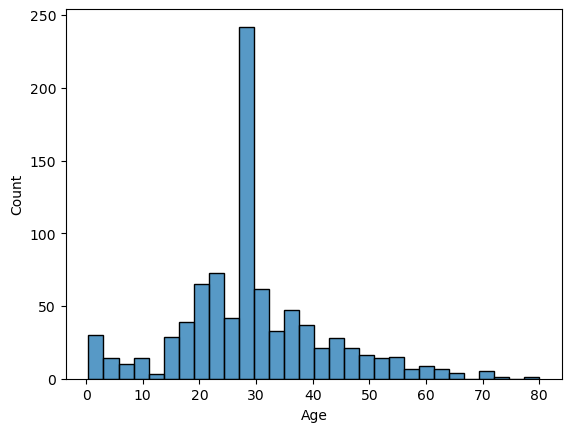

Hisplot of  Fare


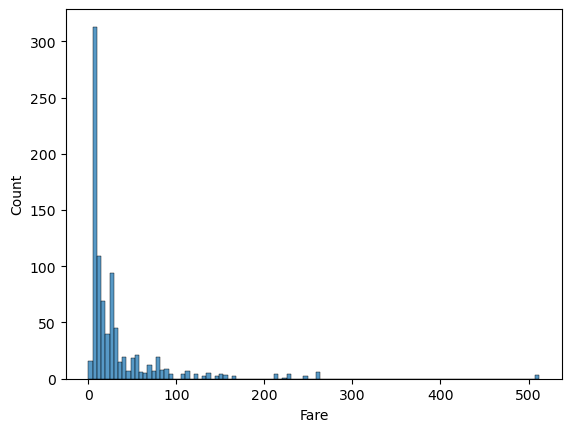

In [32]:
for i in num_cols:
    print("Hisplot of ", i)
    sns.histplot(x = data[i])
    plt.show()

Boxplot of  Age


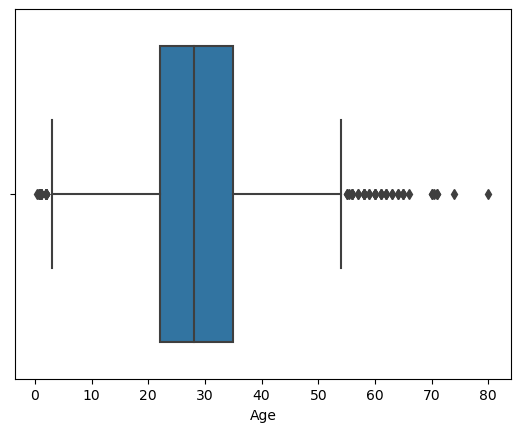

Boxplot of  Fare


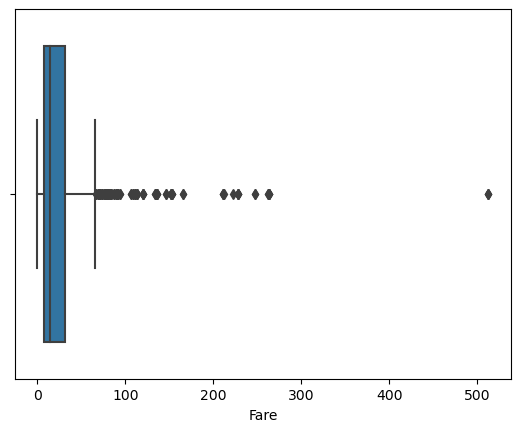

In [31]:
for i in num_cols:
    print("Boxplot of ", i)
    sns.boxplot(x = data[i])
    plt.show()

#### Categorical

Count of  Survived


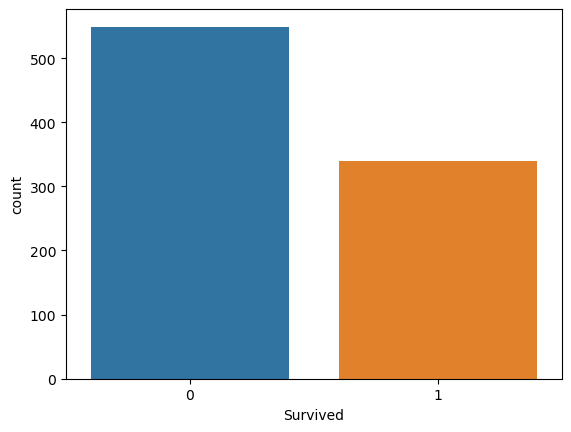

Count of  Pclass


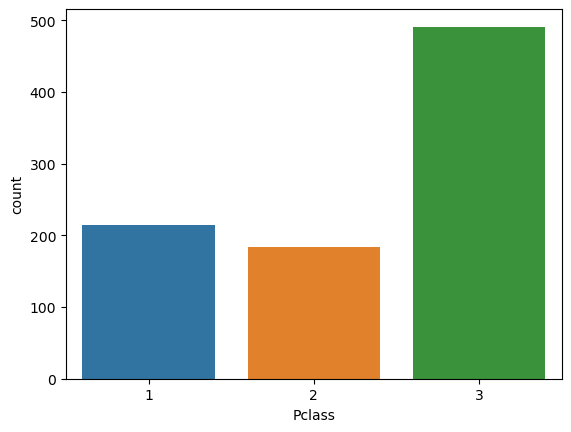

Count of  Sex


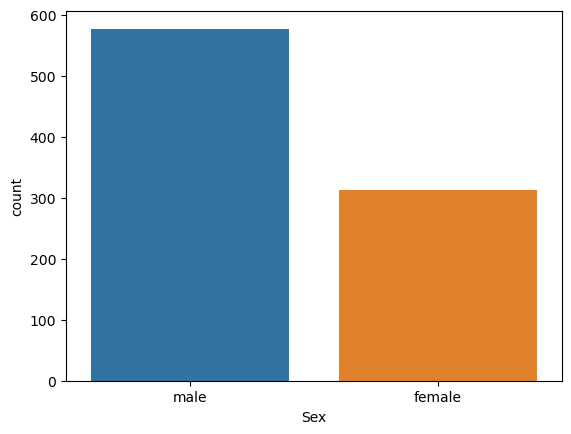

Count of  SibSp


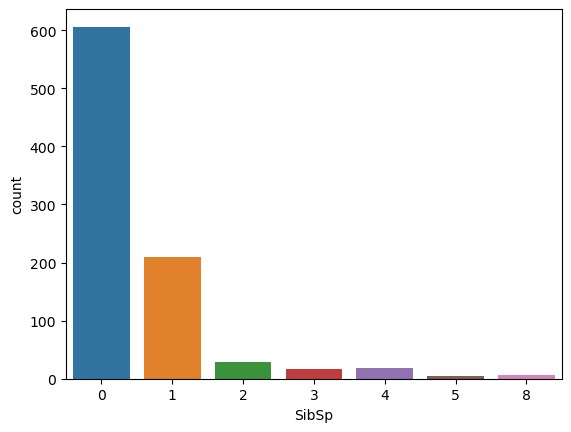

Count of  Parch


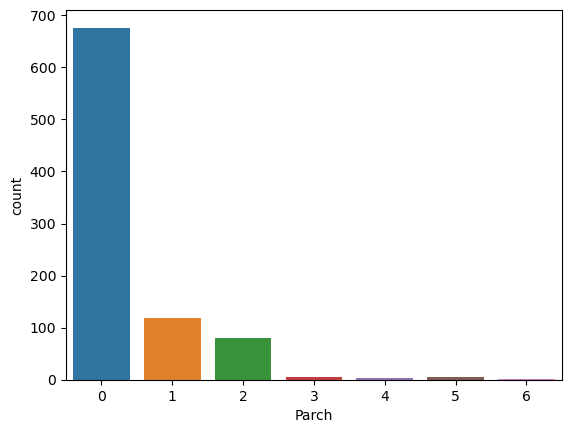

Count of  Embarked


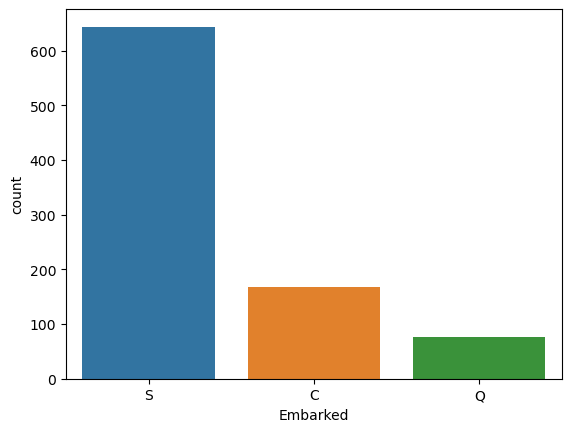

In [30]:
for i in cat_cols:
    print("Count of ", i)
    sns.countplot(x = data[i])
    plt.show()

### Bivariate Analysis

#### Numerical vs Numerical

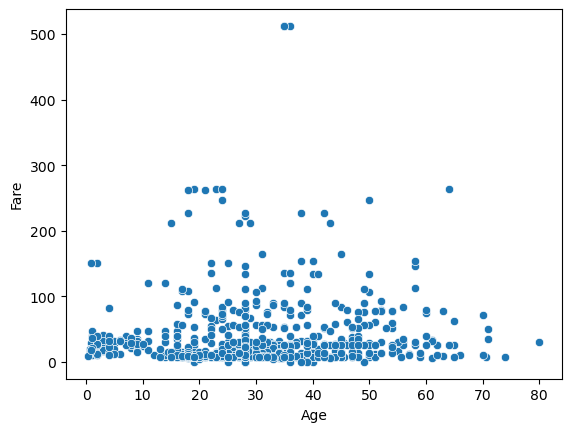

In [33]:
sns.scatterplot(x = data['Age'], y = data['Fare'])
plt.show()

#### Numerical vs Categorical

Boxplot of  Survived vs Age


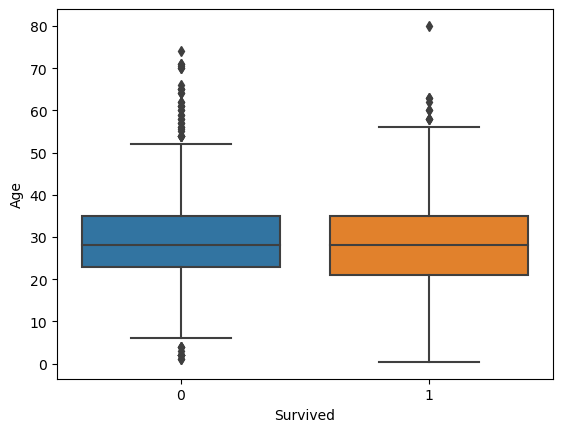

Boxplot of  Survived vs Fare


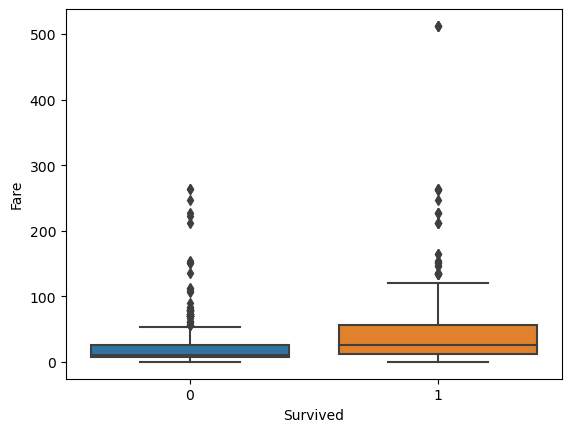

Boxplot of  Pclass vs Age


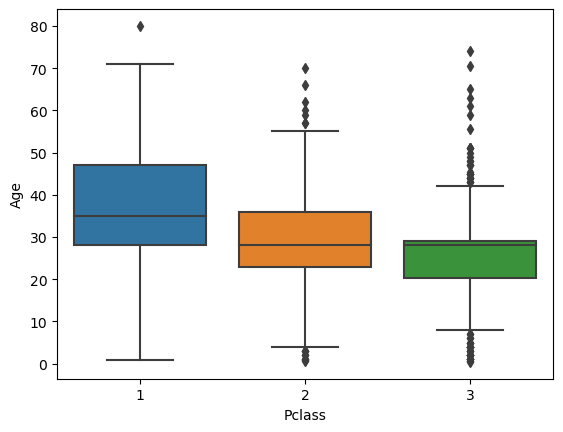

Boxplot of  Pclass vs Fare


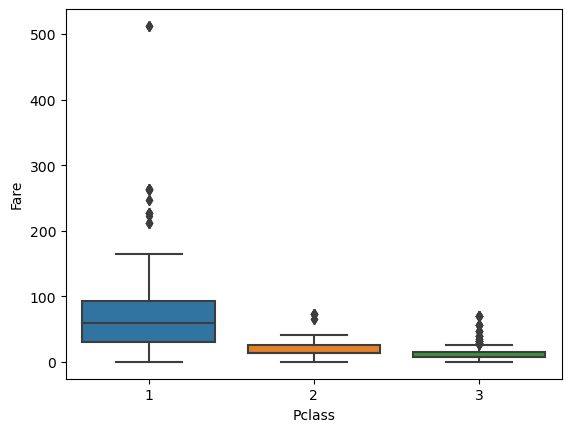

Boxplot of  Sex vs Age


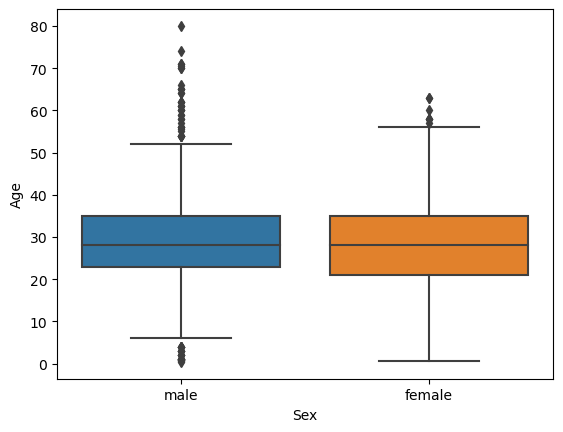

Boxplot of  Sex vs Fare


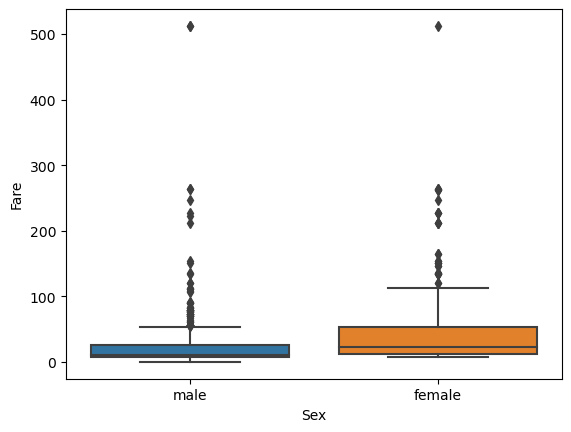

Boxplot of  SibSp vs Age


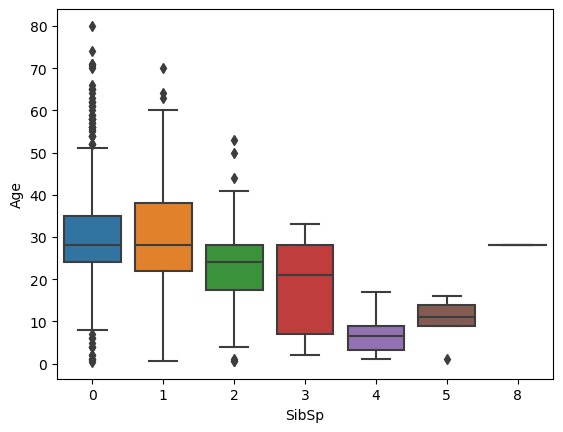

Boxplot of  SibSp vs Fare


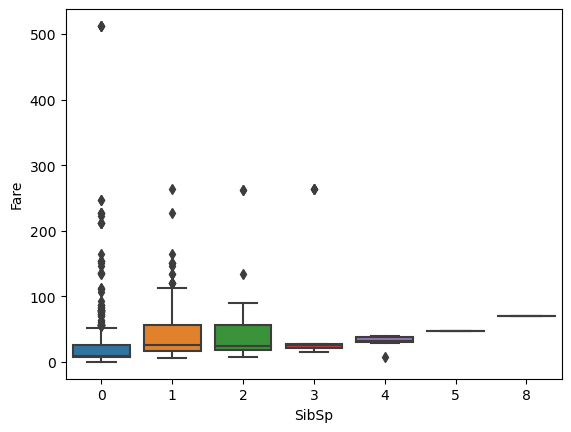

Boxplot of  Parch vs Age


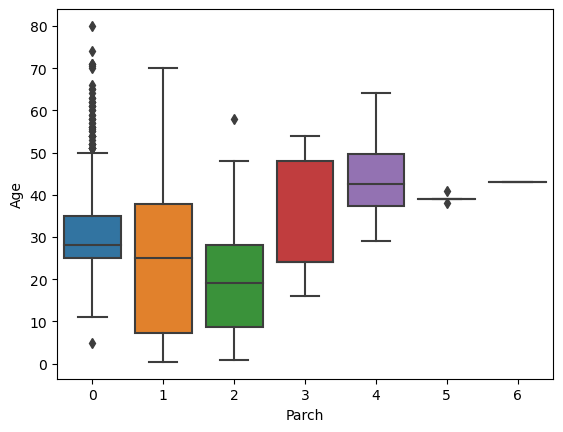

Boxplot of  Parch vs Fare


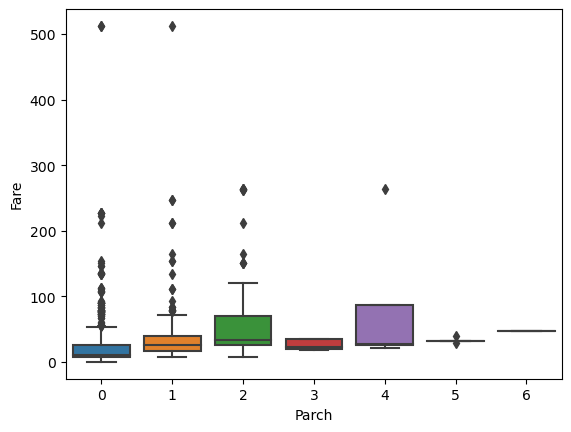

Boxplot of  Embarked vs Age


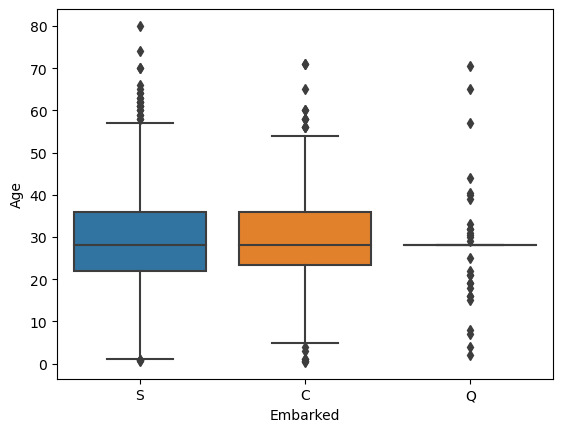

Boxplot of  Embarked vs Fare


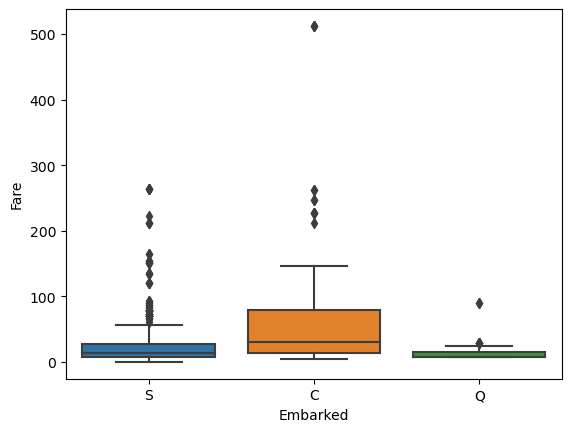

In [34]:
for col1 in cat_cols:
    for col2 in num_cols:
        print('Boxplot of ', col1, 'vs', col2)
        sns.boxplot(x = data[col1], y = data[col2])
        plt.show()

#### Categorical vs Categorical

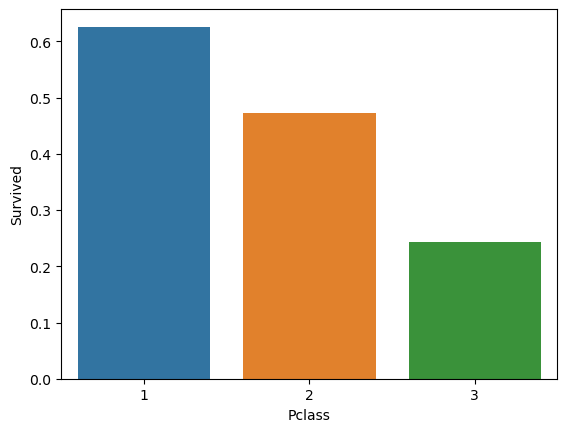

In [35]:
sns.barplot(x = data['Pclass'], y = data['Survived'], ci=None)
plt.show()

### Multivariate Analysis

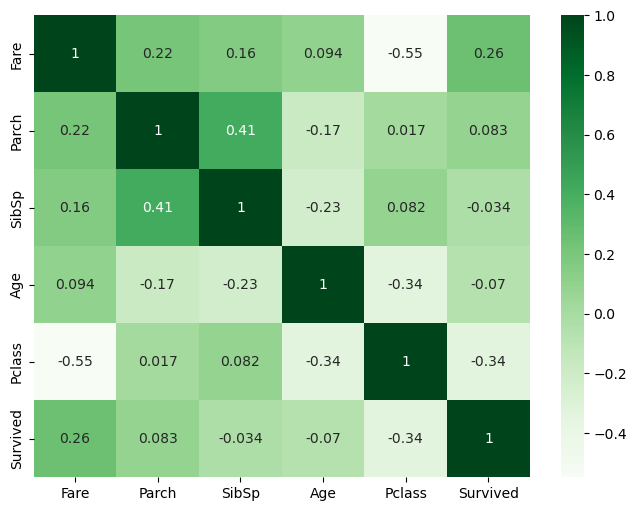

In [39]:
plt.figure(figsize=(8,6)) 
sns.heatmap(data[["Fare","Parch","SibSp","Age","Pclass","Survived"]].corr(),annot=True,cmap='Greens') 
plt.show()